# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hospitalization, ICU stats
- **Historic time series data:**
    - US State testing and hospitalization, ICU stats

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/orig/jh_live_global_orig.csv')

In [4]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [5]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [6]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [7]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [12]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [13]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

PENDING

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [14]:
jh_live_date = jh_live_global['Last_Update'][7] # The 0th item is not updated (Diamond princess) so grab one that is updated instead.
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-11-21 00:00:00')

In [15]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-11-20 00:00:00')

In [16]:
# Date to zoom in on for charting recent data
zoom_date1 = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'
zoom_date4 = '5/1/2020'
zoom_date5 = '5/15/2020'
zoom_date6 = '6/1/2020'
zoom_date7 = '6/15/2020'
zoom_date8 = '7/1/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [17]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,57564083
Deaths,1372182
Recovered,36875075
Active,19316826


In [18]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(12, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,11910858,254413,4457930,7198515,2020-11-21 05:25:51,37.936303,-91.379001
India,9050597,132726,8478124,439747,2020-11-21 05:25:51,23.088275,81.806127
Brazil,6020164,168613,5430896,420655,2020-11-21 05:25:51,-12.669522,-48.480493
France,2160343,48341,155829,1956173,2020-11-21 05:25:51,8.314863,-21.695174
Russia,2023025,34980,1539352,448693,2020-11-21 05:25:51,54.546312,62.120860


<AxesSubplot:title={'center':'Top Countries - Confirmed Cases Over Time'}>

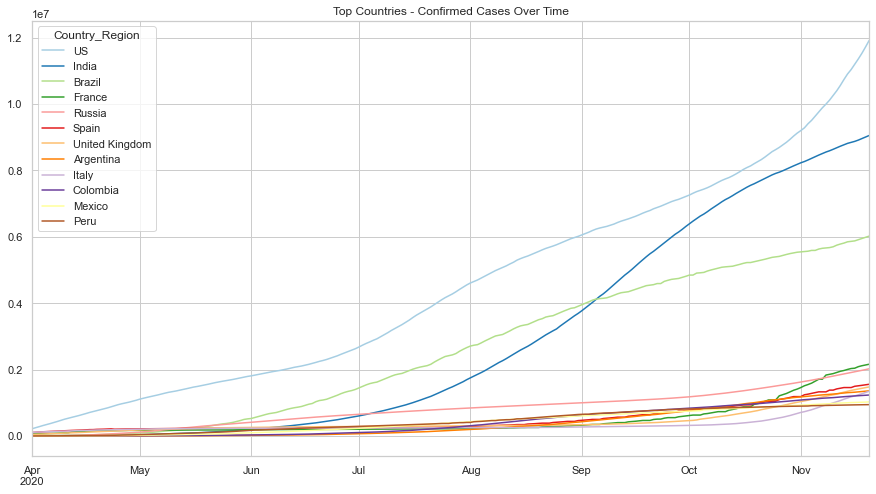

In [19]:
# Plot the top countries confirmed infections over time
jh_hist_countries_cases.loc[zoom_date2:, top_countries.index].plot(figsize=(15,8), title="Top Countries - Confirmed Cases Over Time")

### US State Level

In [20]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(12, 'Confirmed')
top_states

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
Texas,1117495,20751,0,1096744,2020-11-21 05:25:51,31.660643,-98.653069
California,1089750,18640,0,1071110,2020-11-21 05:25:51,37.843962,-120.728594
Florida,923418,17889,0,905529,2020-11-21 05:25:51,28.940755,-82.700744
Illinois,634395,11795,0,622600,2020-11-21 05:25:51,39.843618,-89.178330
New York,584850,34252,0,550598,2020-11-21 05:25:51,42.544151,-75.474183
Georgia,440591,9142,0,431449,2020-11-21 05:25:51,32.808532,-83.577430
Wisconsin,365190,3091,0,362099,2020-11-21 05:25:51,44.395143,-89.797980
Ohio,335423,5955,0,329468,2020-11-21 05:25:51,40.310670,-82.835408
Tennessee,331532,4202,0,327330,2020-11-21 05:25:51,35.885102,-86.108723


<AxesSubplot:title={'center':'Confirmed Cases - Top US States'}>

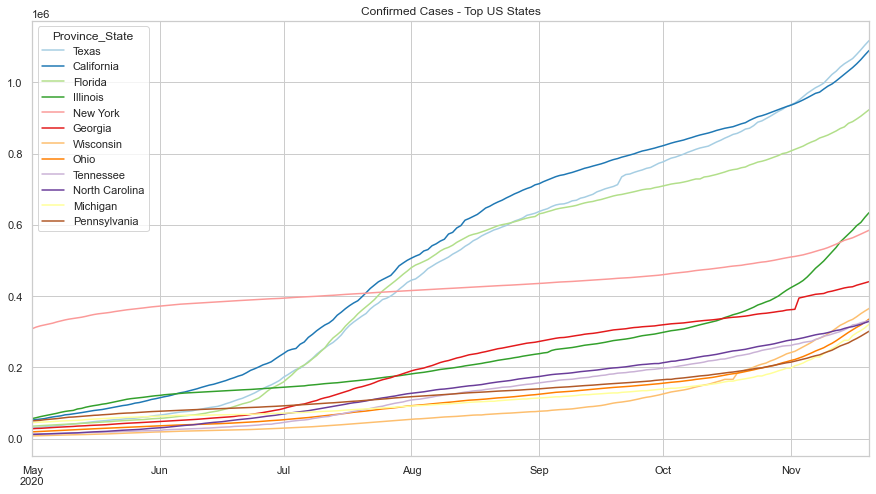

In [21]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date4:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top US States'}>

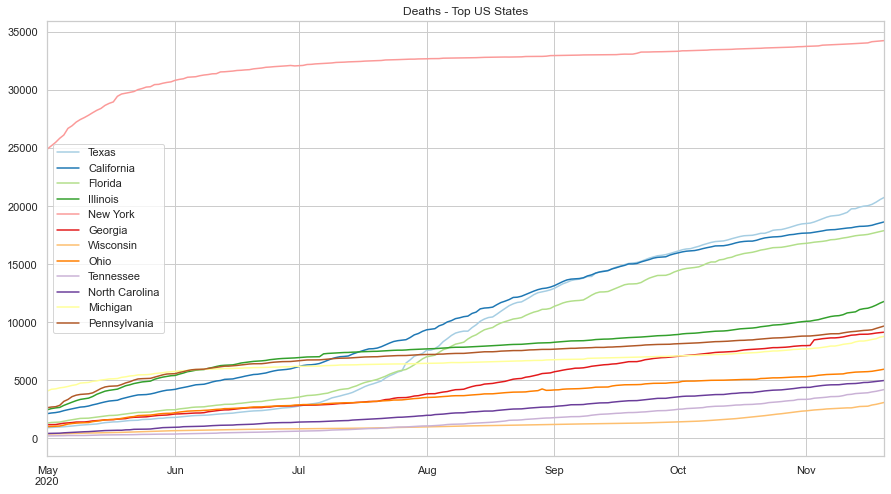

In [22]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date4:, :].plot(title='Deaths - Top US States', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top US States (ex NY)'}>

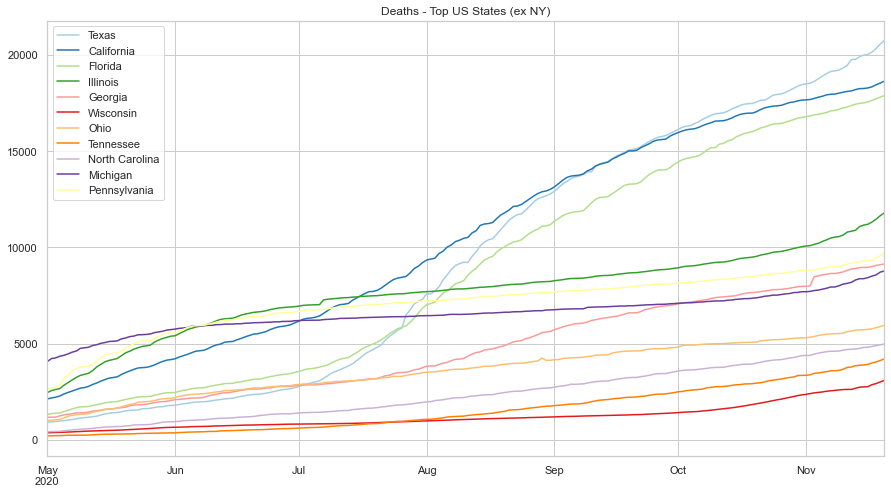

In [23]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date4:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [24]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(12, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,40680,2374,0,38306,2020-11-21 05:25:51,42.486077,-71.390492,25017.0
Suffolk,34270,1224,0,33046,2020-11-21 05:25:51,42.327951,-71.078504,25025.0
Essex,30674,1414,0,29260,2020-11-21 05:25:51,42.668763,-70.946872,25009.0
Worcester,22038,1233,0,20805,2020-11-21 05:25:51,42.350270,-71.904934,25027.0
Bristol,17337,825,0,16512,2020-11-21 05:25:51,41.792284,-71.108722,25005.0


<AxesSubplot:title={'center':'Confirmed Cases - Top MA Counties'}>

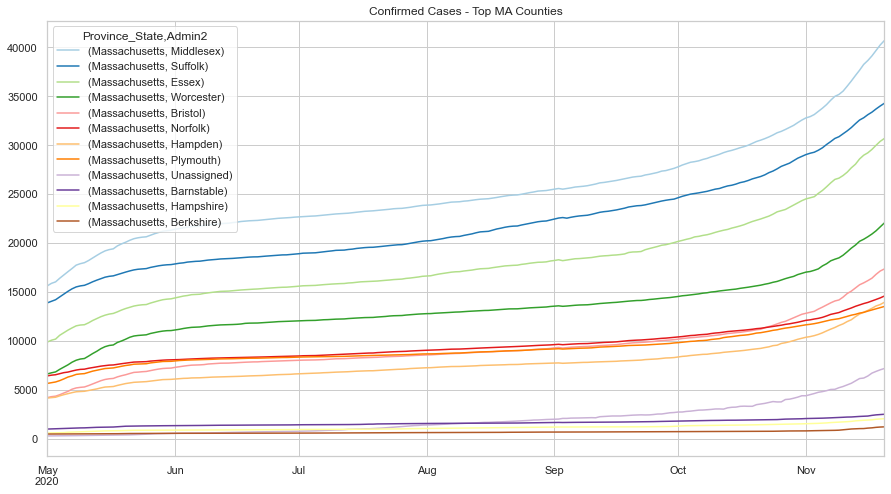

In [25]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top MA Counties'}>

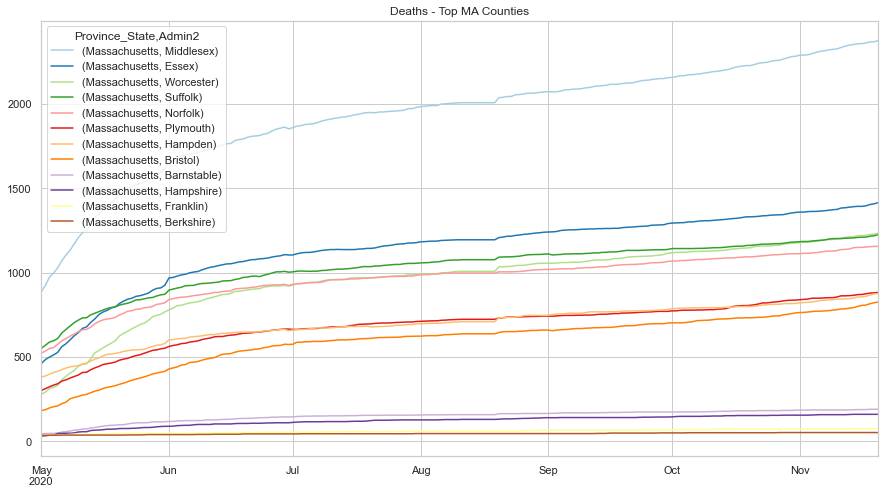

In [26]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [27]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(12, 'Confirmed')
top_counties_CA.head(5)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,357451,7396,0,350055,2020-11-21 05:25:51,34.308284,-118.228241,6037.0
San Bernardino,81328,1125,0,80203,2020-11-21 05:25:51,34.840603,-116.177469,6071.0
Riverside,78535,1400,0,77135,2020-11-21 05:25:51,33.743150,-115.993358,6065.0
San Diego,69231,960,0,68271,2020-11-21 05:25:51,33.034846,-116.736533,6073.0
Orange,68336,1540,0,66796,2020-11-21 05:25:51,33.701475,-117.764600,6059.0


<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties'}>

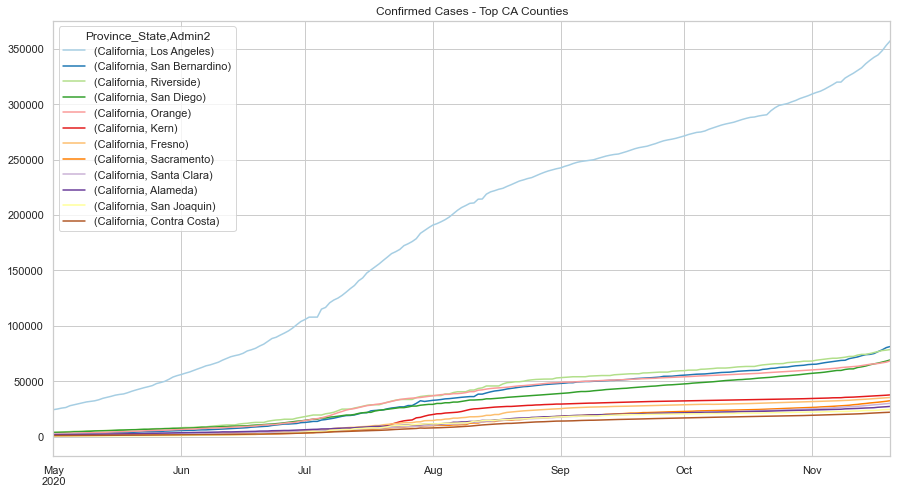

In [28]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(12).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties (excl Los Angeles)'}>

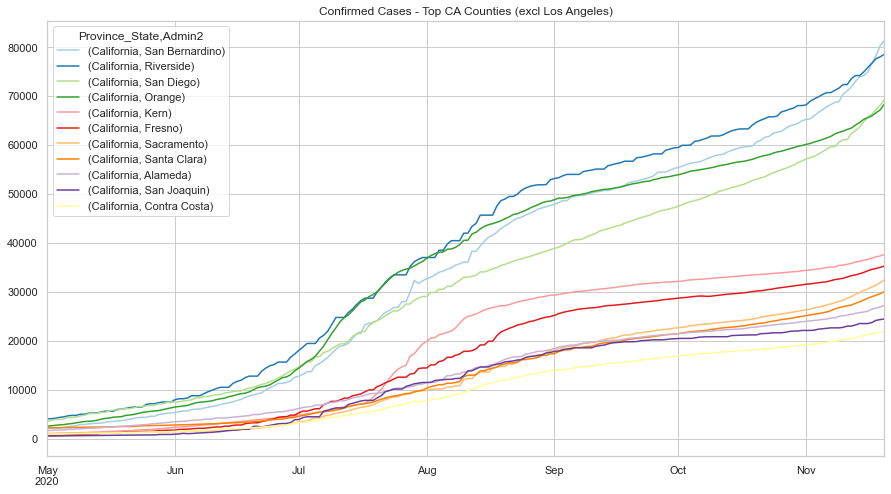

In [29]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties'}>

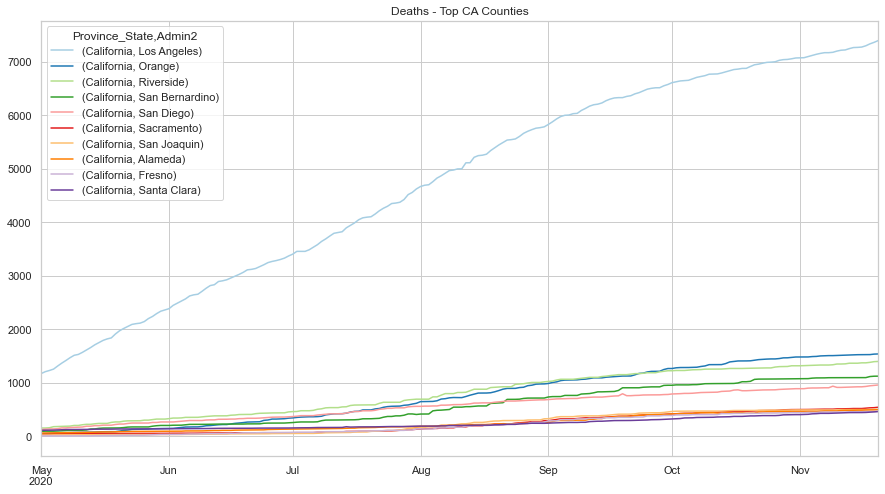

In [30]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(10).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties (excl Los Angeles)'}>

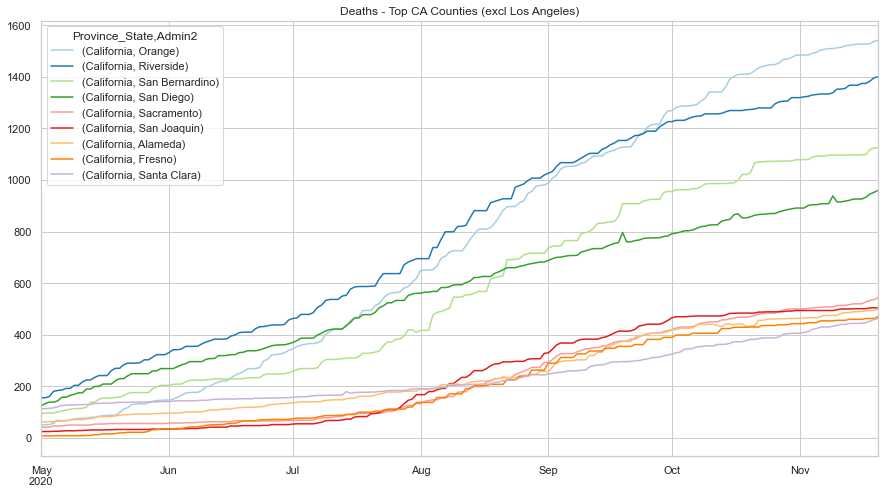

In [31]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [32]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [33]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [34]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [35]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [36]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",68336,1540,0,66796,2020-11-21 05:25:51,33.701475,-117.764600
"(Massachusetts, Middlesex)",40680,2374,0,38306,2020-11-21 05:25:51,42.486077,-71.390492
"(Massachusetts, Suffolk)",34270,1224,0,33046,2020-11-21 05:25:51,42.327951,-71.078504
"(Massachusetts, Essex)",30674,1414,0,29260,2020-11-21 05:25:51,42.668763,-70.946872
"(Massachusetts, Bristol)",17337,825,0,16512,2020-11-21 05:25:51,41.792284,-71.108722
Costa Rica,129418,1608,79372,48438,2020-11-21 05:25:51,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [37]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [38]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [39]:
# Check the most recent 8 days (week + start)
fnf_hist_cases.tail(8)

Province_State California Massachusetts                        Costa Rica
Admin2             Orange     Middlesex Suffolk  Essex Bristol           
2020-11-13          64058         37113   32188  28045   15394     122123
2020-11-14          64586         37652   32561  28583   15723     123223
2020-11-15          65225         38246   32792  28965   15919     123223
2020-11-16          65605         38643   33106  29209   16146     124592
2020-11-17          65957         39117   33366  29558   16397     125590
2020-11-18          66585         39666   33695  29983   16791     127012
2020-11-19          67167         40230   33994  30381   17128     128231
2020-11-20          68336         40680   34270  30674   17337     129418

In [40]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

<AxesSubplot:title={'center':'Confirmed Cases - Counties of Friends & Family'}>

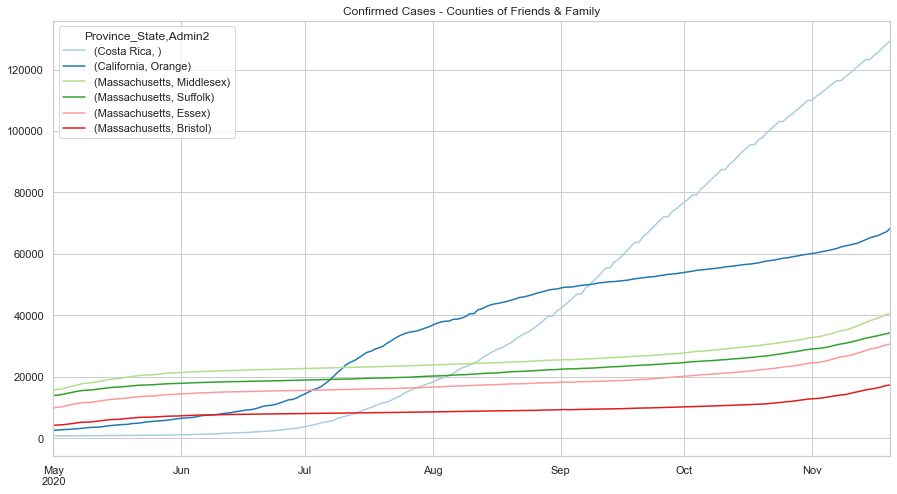

In [41]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date4:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [42]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [43]:
# Add MA "Unassigned" since there are days where deaths are flat on the County level while they are unassigned
fnf_hist_deaths[('Massachusetts', 'Unassigned')] = jh_hist_uscounties_deaths.loc[:, ('Massachusetts', 'Unassigned') ]

In [44]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [45]:
# Check the most recent 8 days (week + start)
fnf_hist_deaths.tail(8)

Province_State California Massachusetts                                   \
Admin2             Orange     Middlesex Suffolk Essex Bristol Unassigned   
2020-11-13           1522          2347    1204  1387     789          6   
2020-11-14           1524          2351    1205  1390     792          6   
2020-11-15           1526          2355    1208  1392     799          7   
2020-11-16           1526          2356    1209  1392     805          7   
2020-11-17           1526          2360    1210  1395     807          7   
2020-11-18           1528          2366    1215  1403     815          7   
2020-11-19           1537          2367    1218  1407     821          7   
2020-11-20           1540          2374    1224  1414     825          7   

Province_State Costa Rica  
Admin2                     
2020-11-13           1537  
2020-11-14           1546  
2020-11-15           1546  
2020-11-16           1566  
2020-11-17           1578  
2020-11-18           1588  
2020-11-19           1599  
2020-11-20           1608

In [46]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

<AxesSubplot:title={'center':'Deaths - Counties of Friends & Family'}>

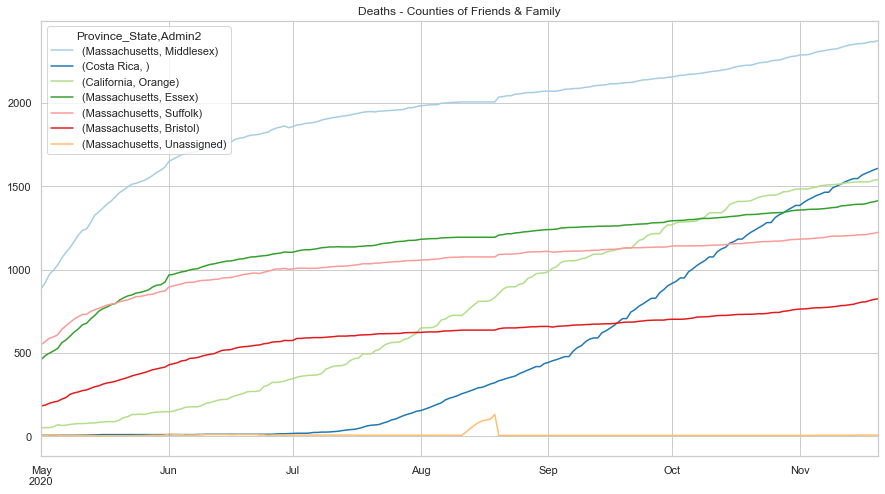

In [47]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date4:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))